In [ ]:
import plotly.graph_objects as go
import pandas as pd

In [ ]:
df = pd.read_csv('./infra.csv')

In [ ]:
unique_source_target = list(pd.unique(df[['source', 'target']].values.ravel('K')))

# For assigning unique number to each source and target
mapping_dict = {k: v for v, k in enumerate(unique_source_target)}

In [ ]:
#mapping of full data
df['source'] = df['source'].map(mapping_dict)
df['target'] = df['target'].map(mapping_dict)

#converting full dataframe as list for using with in plotly
links_dict = df.to_dict(orient='list')

In [ ]:
# Node Colors
colour_for_nodes = {'Azure': 'blue', 'Azure Devops': 'lightslategrey', 'Jenkins':'LightSkyBlue', 
                    'SonarQube':'lemonchiffon', 'GitHub Actions':'violet',
                    'Not managed':'red', 'Fully managed':'green', 'Partially managed':'orange','Pending Decommission':'grey',
                    'Windows Packer Agent - Jenkins':'green',
                    'Rhel8 Packer Agents':'green',
                    'CI Feed Storage Account':'orange',
                    'Windows Packer Agent - ADO':'green',
                    'Rhel8 Linux Packer Agents':'green',
                    'Rhel8 Linux Packer Agents - Node':'green',
                    'Yellow path scalesets':'green',
                    'Sonarqube database':'green',
                    'Azure Postgres server w database':'green',
                    'ARC & eventually packer builds':'green',
                    'K8S deployment for packer builds':'green',
                    'OnPrem - DevOps Managed':'LightSkyBlue',
                    'Jenkins Master':'orange',
                    'Orders Legacy Build Agent':'red',
                    'OnPrem - Externally Managed':'LightSkyBlue',
                    'Octopus':'LightSkyBlue',
                    'Octopus F5 Load Balancer':'LightSkyBlue',
                    'Octopus IIS Clusters (App Hosting)':'LightSkyBlue',
                    'Octopus SQL Database (DB Admin team)':'LightSkyBlue',
                    'Octopus K8S Clusters (App Hosting)':'LightSkyBlue',
                    'CD Feed File Share (App Hosting)':'LightSkyBlue',
                    'Octopus Deploy Masters':'LightSkyBlue',
                    'Worker & Deployment Target':'LightSkyBlue',
                    'Deployment Targets':'LightSkyBlue',
                    'Artifactory':'mediumpurple',
                    'Azure Load Balancer (Central US)':'mediumpurple',
                        'Artifactory Nodes (Central US)':'mediumpurple',
                        'Artifactory DB (Central US)':'mediumpurple',
                        'Artifactory blobstore (Central US)':'mediumpurple',
                        'Azure Load Balancer (NEU prod)':'mediumpurple',
                        'Artifactory Nodes (NEU prod)':'mediumpurple',
                        'Artifactory DB (NEU)':'mediumpurple',
                        'Artifactory blobstore (NEU)':'mediumpurple',
                    'Azure Kubernetes Services':'khaki',
                        'AKS Control Plane (NEU non prod)':'khaki',
                        'AKS Control Plane (NEU  prod)':'khaki',
                        'AKS Control Plane (Central US prod)':'khaki',
                        'AKS Node Pool (default pool)':'khaki',
                        'AKS Node Pool (ado)':'khaki',
                        'AKS Node Pool (adolegacy)':'khaki',
                        'AKS Node Pool (adonodejs)':'khaki',
                        'AKS Node Pool (analytics)':'khaki',
                        'AKS Node Pool (argo)':'khaki',
                        'AKS Node Pool (githubactions)':'khaki',
                    }

colour_list = []
for node in unique_source_target:
    colour_list.append(colour_for_nodes[node])

In [ ]:
#Sankey Diagram Code 
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = unique_source_target,
      color = colour_list,
      
    ),
    link = dict(
      source = links_dict["source"],
      target = links_dict["target"],
      value = links_dict["value"],
      color = links_dict['link_colour'],
  
  ))])

fig.update_layout(title_text="DevOps Infrastructure Sankey Diagram", font_size=10,width=1000, height=1000)
fig.show()

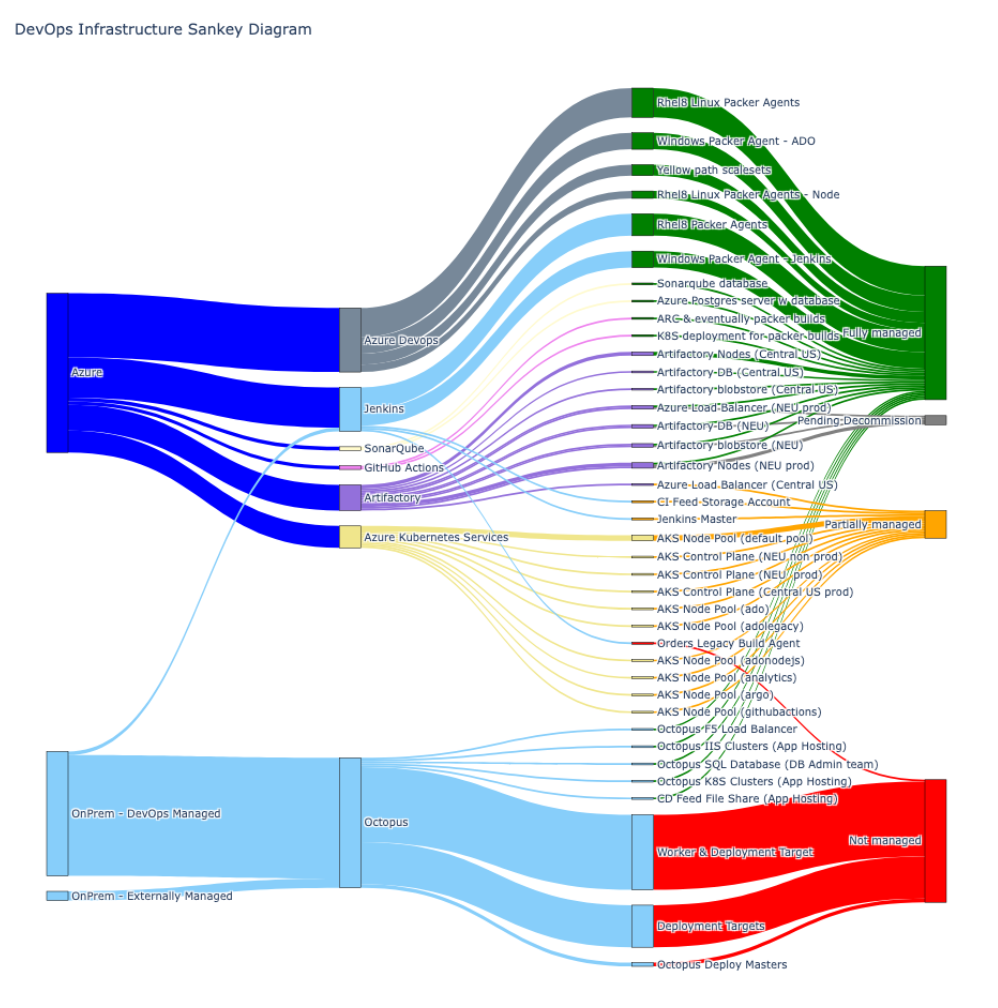